# CP


## SETUP


In [1]:
import sys
import os

# Adjust the path as needed to reach your project root from the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

project_root

'/Users/peterfalterbaum/Documents/Nova/thesis local/implementation/public_implementation'

In [2]:
from config import PROJECT_ROOT
from pathlib import Path

In [ ]:
meta_data_json_paths = [
    str(PROJECT_ROOT) + "/data/results/decompositions/CP/final/peak hours normalized/performance_metrics_cp_odt_no_same_od_no_rare_od_fixed_thresh_normalizedPeaks_cumulative25pct.json",
    str(PROJECT_ROOT) + "/data/results/decompositions/CP/final/peak hours normalized/performance_metrics_cp_odt_no_same_od_no_rare_od_fixed_thresh_normalizedPeaks_cumulative20pct.json"
]


dark_grey = '#333333'    # Highlight line
# city = 'utrecht'  # Change to 'rotterdam' if needed
# time_scale = "hourly_weekday"
# # time_scale = "hourly_weekend"

## IMPLEMENTATION


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json


def load_meta_data(meta_data_json_path):
    with open(meta_data_json_path, 'r') as file:
        meta_data = json.load(file)
    return meta_data

In [7]:
def plot_EVvsPE(meta_data, city, time_scale, cumuluative_threshold, selected_rank=None):
    weekday_data = meta_data['data'][city][time_scale]

    # Prepare data for plotting
    ranks = []
    explained_variance = []
    pattern_efficiency = []

    for rank_str, metrics in weekday_data.items():
        rank = int(rank_str)

        # Skip rank 1
        if rank == 1 or rank > 12:
            continue

        ev = metrics['explained_variance']

        # Calculate pattern efficiency: Σc / r
        c1 = metrics['c1_unique_zones']
        c2 = metrics['c2']
        c3 = metrics['c3_distinct_time_bins']
        sigma_c = c1 + c2 + c3
        pattern_efficiency_value = sigma_c / rank

        ranks.append(rank)
        explained_variance.append(ev)
        pattern_efficiency.append(pattern_efficiency_value)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Explained Variance (blue line, left axis)
    color = 'tab:blue'
    ax1.set_xlabel('Rank')
    ax1.set_ylabel('Explained Variance', color=color)
    line1 = ax1.plot(ranks, explained_variance, 'o-', color=color,
                     label='Explained Variance (EV)', linewidth=2, markersize=6)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, alpha=0.3)

    # Create second y-axis for Pattern Efficiency
    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Pattern Efficiency', color=color)
    line2 = ax2.plot(ranks, pattern_efficiency, 's--', color=color,
                     label='Pattern Efficiency (Σc / r)', linewidth=2, markersize=6)
    ax2.tick_params(axis='y', labelcolor=color)

    # Add title and legend
    # plt.title(f'{city.capitalize()} - {time_scale.capitalize()} - {cumuluative_threshold} %: EV & PE vs. Rank', fontsize=14, fontweight='bold')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2,
               loc='upper left', bbox_to_anchor=(0.02, 0.98))

    # Set x-axis to show all ranks with padding
    ax1.set_xticks(ranks)
    ax1.set_xlim(1.5, 12.5)  # Added padding on both sides

    # Increase y-axis limits by 15% to add padding
    ev_min, ev_max = ax1.get_ylim()
    pe_min, pe_max = ax2.get_ylim()

    ev_range = ev_max - ev_min
    pe_range = pe_max - pe_min

    ax1.set_ylim(ev_min, ev_max + 0.15 * ev_range)
    ax2.set_ylim(pe_min, pe_max + 0.15 * pe_range)

    print(ranks)
    if selected_rank in ranks:
        idx = ranks.index(selected_rank) + 2
        ax1.axvline(x=idx, color=dark_grey, linestyle='-.', linewidth=1)
        # ax1.text(idx, max(explained_variance), selected_rank, rotation=90,
        #          va='bottom', ha='right', color=dark_grey, fontsize=8)

    # Remove top border
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    # Adjust layout
    plt.tight_layout()

    # Create filename based on parameters
    time_scale_short = 'weekday' if 'weekday' in time_scale else 'weekend'
    filename = f"{city}_{time_scale_short}_{cumuluative_threshold}.png"
    save_path = str(PROJECT_ROOT) + f"/code/rank_selection/cp/{filename}"

    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    # Optional: Print some statistics
    print(
        f"Data for {city.capitalize()} - {time_scale_short.capitalize()}, {cumuluative_threshold} %:")
    print(
        f"Explained Variance range: {explained_variance}")
    print(
        f"Pattern Efficiency range: {pattern_efficiency}")
    print(f"Plot saved as: {filename}")

## Loop


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


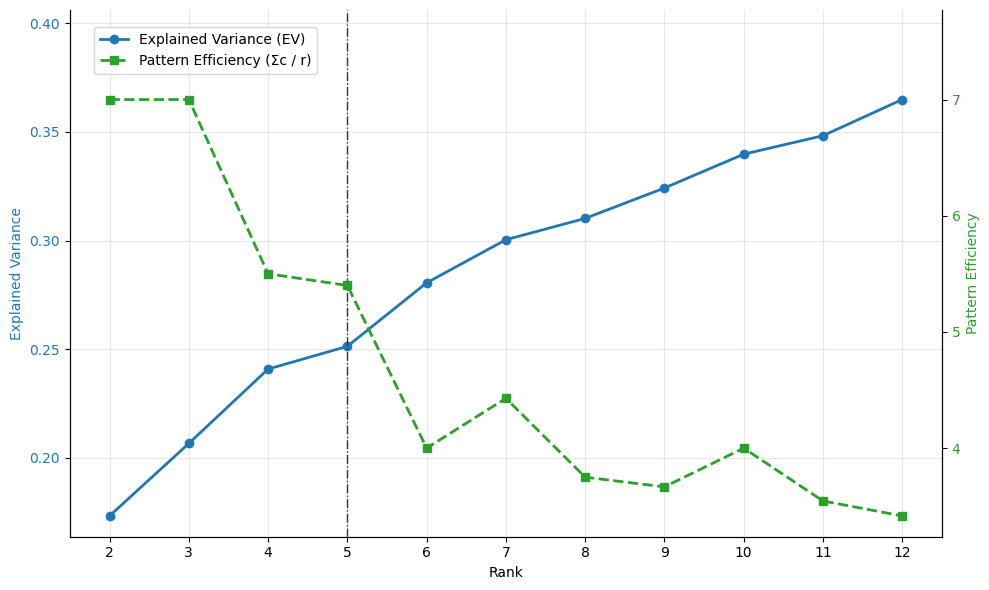

Data for Utrecht - Weekday, 25 %:
Explained Variance range: [0.17325878143310547, 0.206609308719635, 0.24084442853927612, 0.25131726264953613, 0.2805550694465637, 0.3003873825073242, 0.31020188331604004, 0.32420146465301514, 0.3397684693336487, 0.34827107191085815, 0.3649292588233948]
Pattern Efficiency range: [7.0, 7.0, 5.5, 5.4, 4.0, 4.428571428571429, 3.75, 3.6666666666666665, 4.0, 3.5454545454545454, 3.4166666666666665]
Plot saved as: utrecht_weekday_25.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


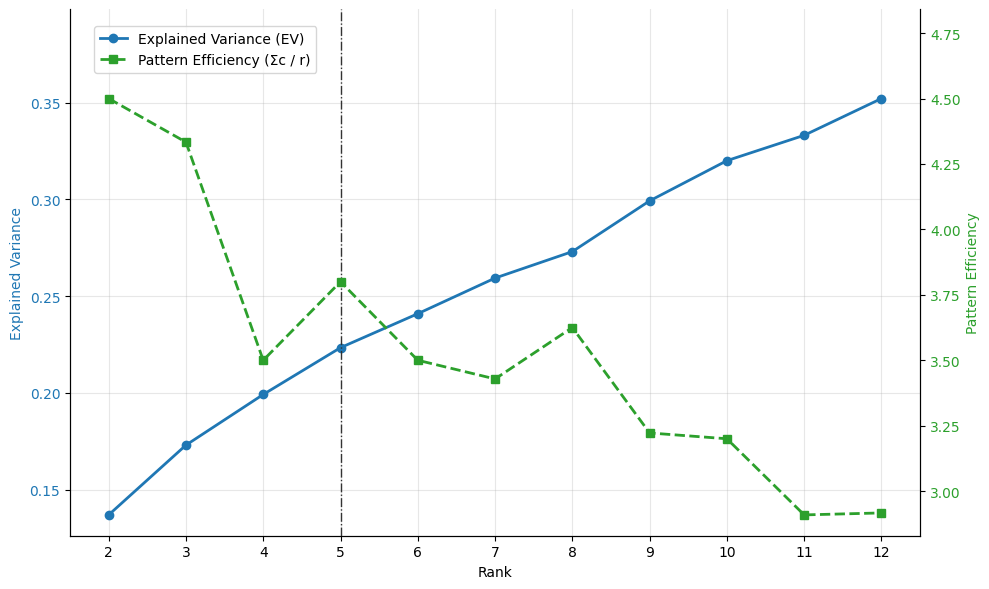

Data for Utrecht - Weekend, 25 %:
Explained Variance range: [0.136915922164917, 0.17299336194992065, 0.1991729736328125, 0.22337406873703003, 0.24093061685562134, 0.25934940576553345, 0.2730308175086975, 0.2992686629295349, 0.32004696130752563, 0.33315831422805786, 0.3521725535392761]
Pattern Efficiency range: [4.5, 4.333333333333333, 3.5, 3.8, 3.5, 3.4285714285714284, 3.625, 3.2222222222222223, 3.2, 2.909090909090909, 2.9166666666666665]
Plot saved as: utrecht_weekend_25.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


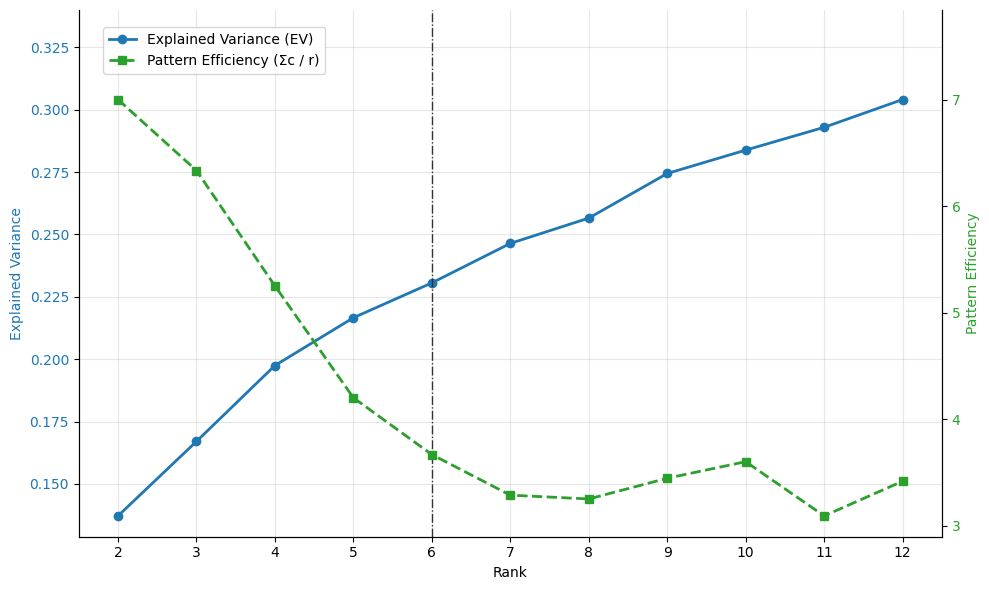

Data for Rotterdam - Weekday, 25 %:
Explained Variance range: [0.1371975541114807, 0.1670495867729187, 0.19746726751327515, 0.2166176438331604, 0.23058456182479858, 0.24640733003616333, 0.25655001401901245, 0.27442437410354614, 0.2837955355644226, 0.29293394088745117, 0.30406832695007324]
Pattern Efficiency range: [7.0, 6.333333333333333, 5.25, 4.2, 3.6666666666666665, 3.2857142857142856, 3.25, 3.4444444444444446, 3.6, 3.090909090909091, 3.4166666666666665]
Plot saved as: rotterdam_weekday_25.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


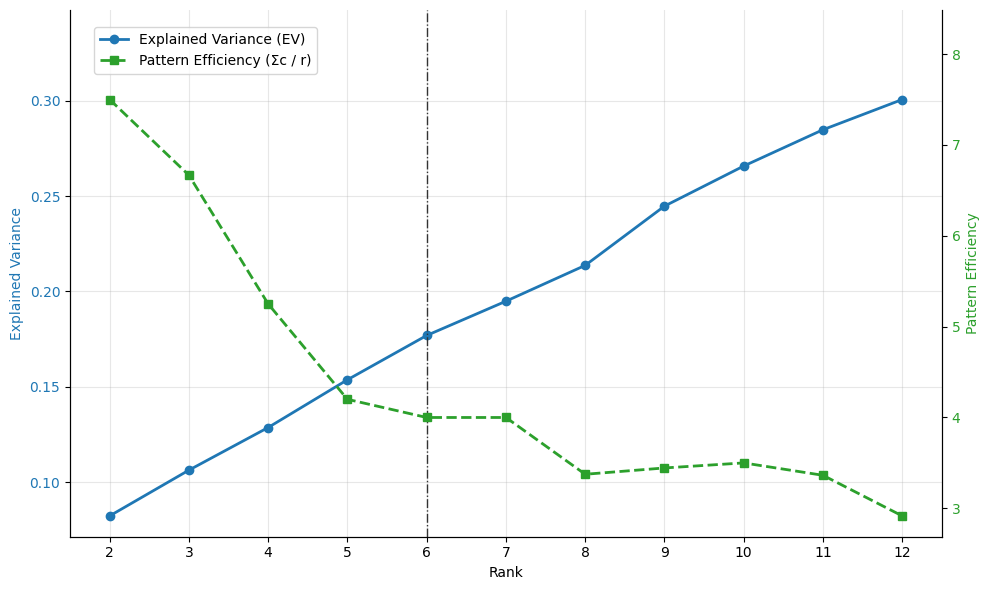

Data for Rotterdam - Weekend, 25 %:
Explained Variance range: [0.08243286609649658, 0.10640215873718262, 0.12873971462249756, 0.15374761819839478, 0.17695492506027222, 0.1949000358581543, 0.2136722207069397, 0.24470263719558716, 0.26570773124694824, 0.2847212553024292, 0.3005504012107849]
Pattern Efficiency range: [7.5, 6.666666666666667, 5.25, 4.2, 4.0, 4.0, 3.375, 3.4444444444444446, 3.5, 3.3636363636363638, 2.9166666666666665]
Plot saved as: rotterdam_weekend_25.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


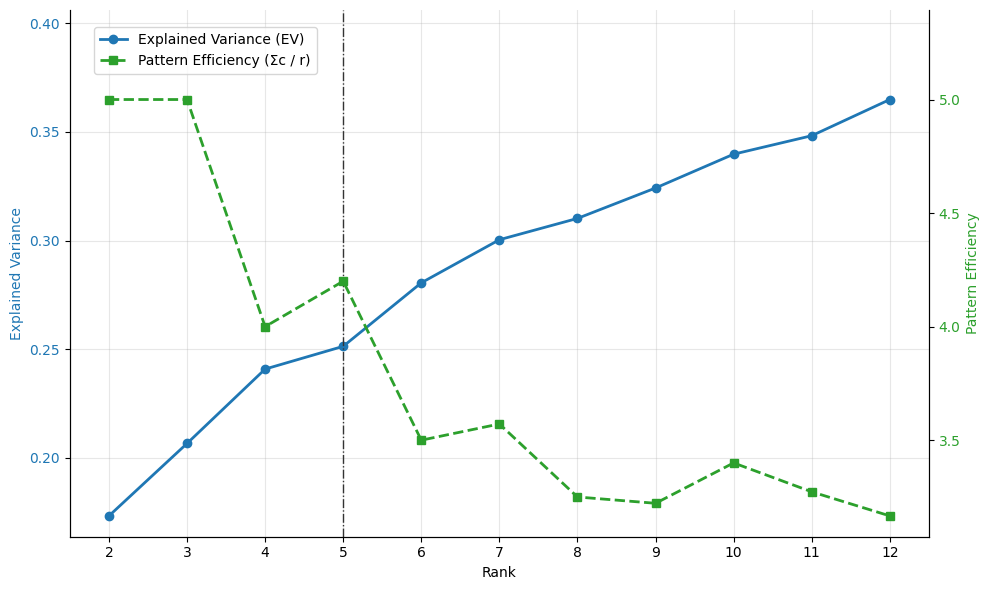

Data for Utrecht - Weekday, 20 %:
Explained Variance range: [0.17325878143310547, 0.206609308719635, 0.24084442853927612, 0.25131726264953613, 0.2805550694465637, 0.3003873825073242, 0.31020188331604004, 0.32420146465301514, 0.3397684693336487, 0.34827107191085815, 0.3649292588233948]
Pattern Efficiency range: [5.0, 5.0, 4.0, 4.2, 3.5, 3.5714285714285716, 3.25, 3.2222222222222223, 3.4, 3.272727272727273, 3.1666666666666665]
Plot saved as: utrecht_weekday_20.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


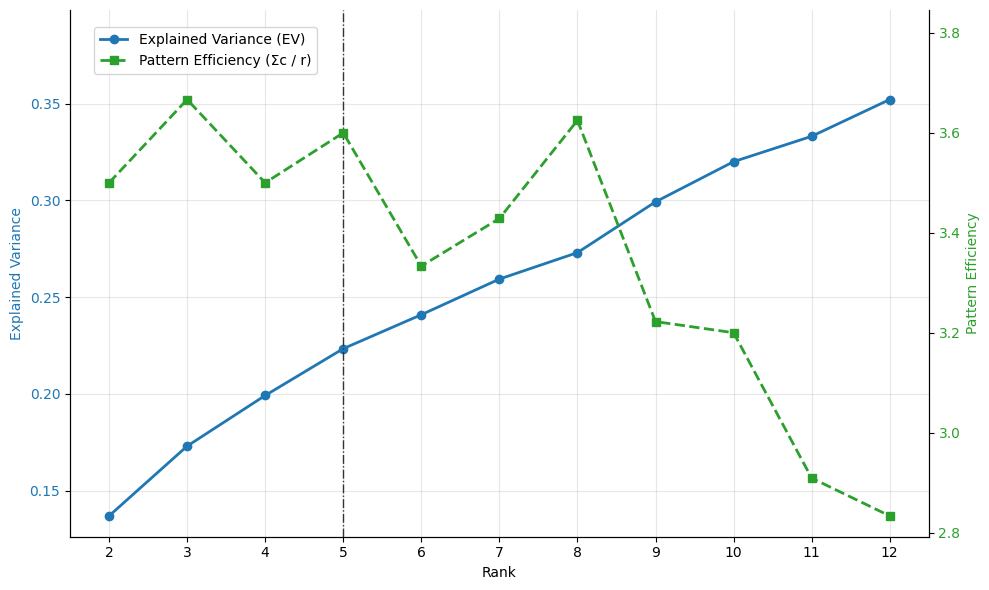

Data for Utrecht - Weekend, 20 %:
Explained Variance range: [0.136915922164917, 0.17299336194992065, 0.1991729736328125, 0.22337406873703003, 0.24093061685562134, 0.25934940576553345, 0.2730308175086975, 0.2992686629295349, 0.32004696130752563, 0.33315831422805786, 0.3521725535392761]
Pattern Efficiency range: [3.5, 3.6666666666666665, 3.5, 3.6, 3.3333333333333335, 3.4285714285714284, 3.625, 3.2222222222222223, 3.2, 2.909090909090909, 2.8333333333333335]
Plot saved as: utrecht_weekend_20.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


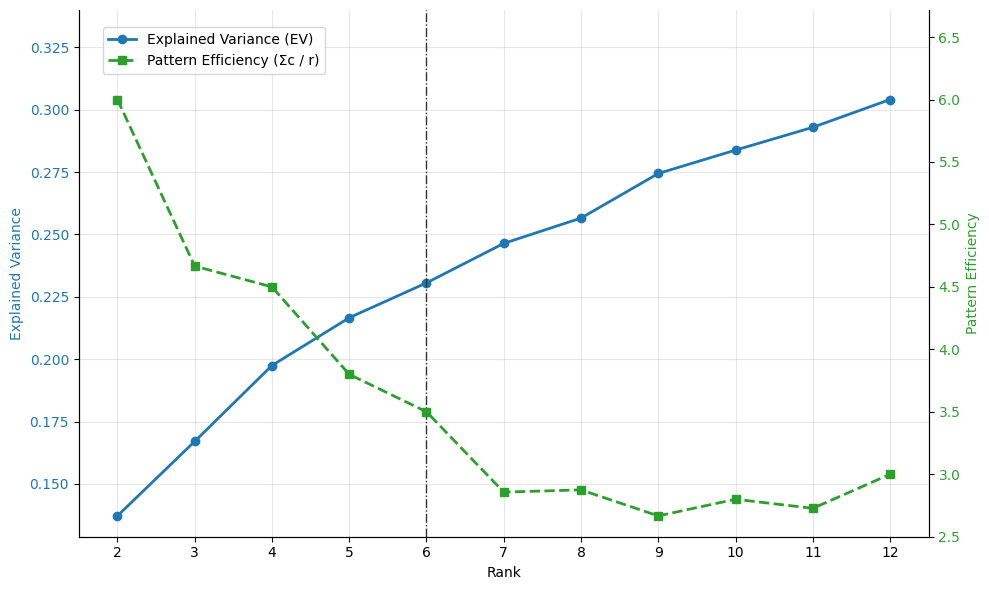

Data for Rotterdam - Weekday, 20 %:
Explained Variance range: [0.1371975541114807, 0.1670495867729187, 0.19746726751327515, 0.2166176438331604, 0.23058456182479858, 0.24640733003616333, 0.25655001401901245, 0.27442437410354614, 0.2837955355644226, 0.29293394088745117, 0.30406832695007324]
Pattern Efficiency range: [6.0, 4.666666666666667, 4.5, 3.8, 3.5, 2.857142857142857, 2.875, 2.6666666666666665, 2.8, 2.727272727272727, 3.0]
Plot saved as: rotterdam_weekday_20.png
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


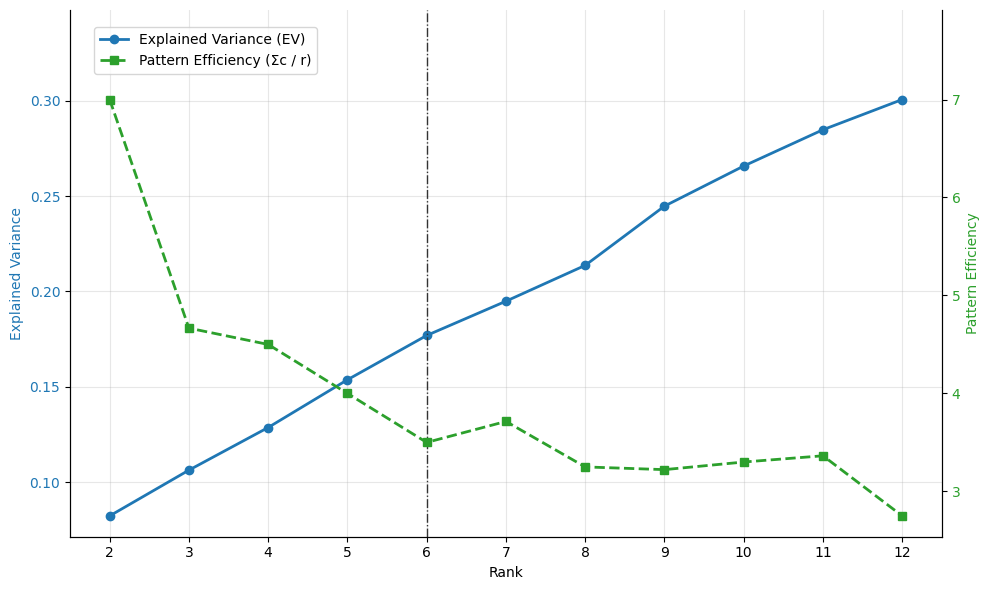

Data for Rotterdam - Weekend, 20 %:
Explained Variance range: [0.08243286609649658, 0.10640215873718262, 0.12873971462249756, 0.15374761819839478, 0.17695492506027222, 0.1949000358581543, 0.2136722207069397, 0.24470263719558716, 0.26570773124694824, 0.2847212553024292, 0.3005504012107849]
Pattern Efficiency range: [7.0, 4.666666666666667, 4.5, 4.0, 3.5, 3.7142857142857144, 3.25, 3.2222222222222223, 3.3, 3.3636363636363638, 2.75]
Plot saved as: rotterdam_weekend_20.png


In [8]:
for meta_data_path in meta_data_json_paths:
    for city in ['utrecht', 'rotterdam']:
        for time_scale in ['hourly_weekday', 'hourly_weekend']:
            meta_data_json_path = f"{meta_data_path}"

            meta_data = load_meta_data(meta_data_json_path)

            if "20pct" in meta_data_json_path:
                cumuluative_threshold = 20
            else:
                cumuluative_threshold = 25

            if "utrecht" == city:
                plot_EVvsPE(meta_data, city, time_scale,
                            cumuluative_threshold, 5)
            elif "rotterdam" == city:
                plot_EVvsPE(meta_data, city, time_scale,
                            cumuluative_threshold, 6)